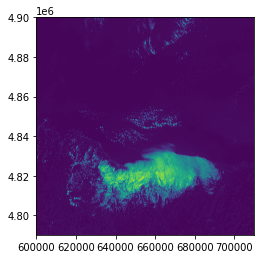

&lt;AxesSubplot:&gt;

In [7]:
#ENLACE# https://www.hatarilabs.com/ih-en/sentinel2-images-explotarion-and-processing-with-python-and-rasterio
"""
Description:
This module contains a method for stackering
"""

#import required libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
#%matplotlib inline

#import bands as separate 1 band raster

imagePath = r'/workspaces/cloudmatrix20/SentinelAsturias/S2B_MSIL2A_20190719T112119_N0213_R037_T29TPJ_20190719T131332/S2B_MSIL2A_20190719T112119_N0213_R037_T29TPJ_20190719T131332.SAFE/GRANULE/L2A_T29TPJ_A012361_20190719T112256/IMG_DATA/R20m/'
band2 = rasterio.open(imagePath +'T29TPJ_20190719T112119_B02_20m.jp2', driver='JP2OpenJPEG') #blue
band3 = rasterio.open(imagePath +'T29TPJ_20190719T112119_B03_20m.jp2', driver='JP2OpenJPEG') #green
band4 = rasterio.open(imagePath +'T29TPJ_20190719T112119_B04_20m.jp2', driver='JP2OpenJPEG') #red
band8 = rasterio.open(imagePath +'T29TPJ_20190719T112119_B8A_20m.jp2', driver='JP2OpenJPEG') #nir
#number of raster bands
band4.count
#number of raster columns
band4.width
#number of raster rows
band4.height
#plot band
plot.show(band4)


In [3]:
#type of raster byte
band4.dtypes[0]
#raster sytem of reference
band4.crs
#raster transform parameters
band4.transform
#raster values as matrix array
band4.read(1)

array([[3247, 3190, 3098, ...,  709,  224,  334],
       [3207, 3191, 3104, ..., 1952,  760,  403],
       [3112, 3122, 3052, ..., 1065, 1243,  607],
       ...,
       [9882, 9888, 9904, ..., 8013, 8075, 8086],
       [9886, 9862, 9895, ..., 7814, 7911, 7970],
       [9863, 9859, 9862, ..., 7677, 7819, 7809]], dtype=uint16)

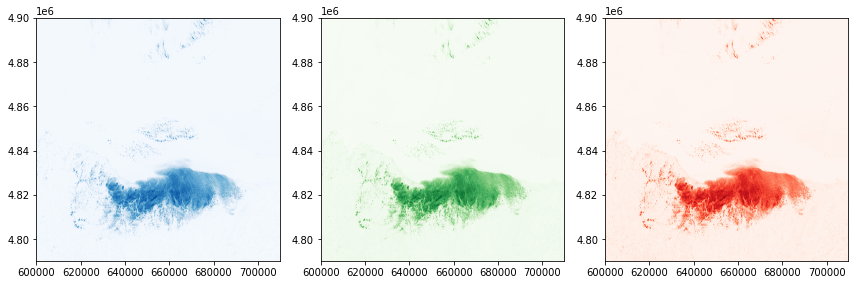

In [10]:
#multiple band representation
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
plot.show(band2, ax=ax1, cmap='Blues')
plot.show(band3, ax=ax2, cmap='Greens')
plot.show(band4, ax=ax3, cmap='Reds')
fig.tight_layout()


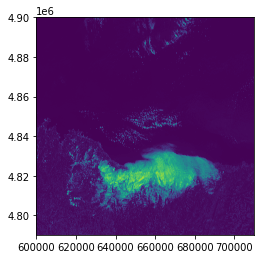

&lt;AxesSubplot:&gt;

In [11]:
#export true color image
trueColor = rasterio.open('/workspaces/cloudmatrix20/SentinelAsturias/S2B_MSIL2A_20190719T112119_N0213_R037_T29TPJ_20190719T131332/S2B_MSIL2A_20190719T112119_N0213_R037_T29TPJ_20190719T131332.SAFE/GRANULE/L2A_T29TPJ_A012361_20190719T112256/IMG_DATA/R20m/SentinelTrueColor.tiff','w',driver='Gtiff',
                         width=band4.width, height=band4.height,
                         count=3,
                         crs=band4.crs,
                         transform=band4.transform,
                         dtype=band4.dtypes[0]
                         )
trueColor.write(band2.read(1),3) #blue
trueColor.write(band3.read(1),2) #green
trueColor.write(band4.read(1),1) #red
trueColor.close()
src = rasterio.open(r'/workspaces/cloudmatrix20/SentinelAsturias/S2B_MSIL2A_20190719T112119_N0213_R037_T29TPJ_20190719T131332/S2B_MSIL2A_20190719T112119_N0213_R037_T29TPJ_20190719T131332.SAFE/GRANULE/L2A_T29TPJ_A012361_20190719T112256/IMG_DATA/R20m/SentinelTrueColor.tiff', count=3)
plot.show(src)

In [12]:
#export false color image
falseColor = rasterio.open('/workspaces/cloudmatrix20/SentinelAsturias/S2B_MSIL2A_20190719T112119_N0213_R037_T29TPJ_20190719T131332/S2B_MSIL2A_20190719T112119_N0213_R037_T29TPJ_20190719T131332.SAFE/GRANULE/L2A_T29TPJ_A012361_20190719T112256/IMG_DATA/R20m/SentinelTrueColor.tiff', 'w', driver='Gtiff',
                          width=band2.width, height=band2.height,
                          count=3,
                          crs=band2.crs,
                          transform=band2.transform,
                          dtype='uint16'
                         )
falseColor.write(band3.read(1),3) #Blue
falseColor.write(band4.read(1),2) #Green
falseColor.write(band8.read(1),1) #Red
falseColor.close()


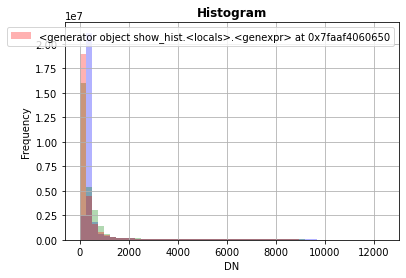

In [14]:
#generate histogram
trueColor = rasterio.open('/workspaces/cloudmatrix20/SentinelAsturias/S2B_MSIL2A_20190719T112119_N0213_R037_T29TPJ_20190719T131332/S2B_MSIL2A_20190719T112119_N0213_R037_T29TPJ_20190719T131332.SAFE/GRANULE/L2A_T29TPJ_A012361_20190719T112256/IMG_DATA/R20m/SentinelTrueColor.tiff')
plot.show_hist(trueColor, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")
